<a href="https://colab.research.google.com/github/vishnupm-22/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **credit card fraud detection**

**Importing the Dependencies**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # separating training data and split data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
credit_data = pd.read_csv('/content/dataset_credit.csv')

In [ ]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checkinf no of missing values in each colums

In [ ]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<ipython-input-86-d06f5eaae468>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data.Amount)


<Axes: xlabel='Amount', ylabel='Density'>

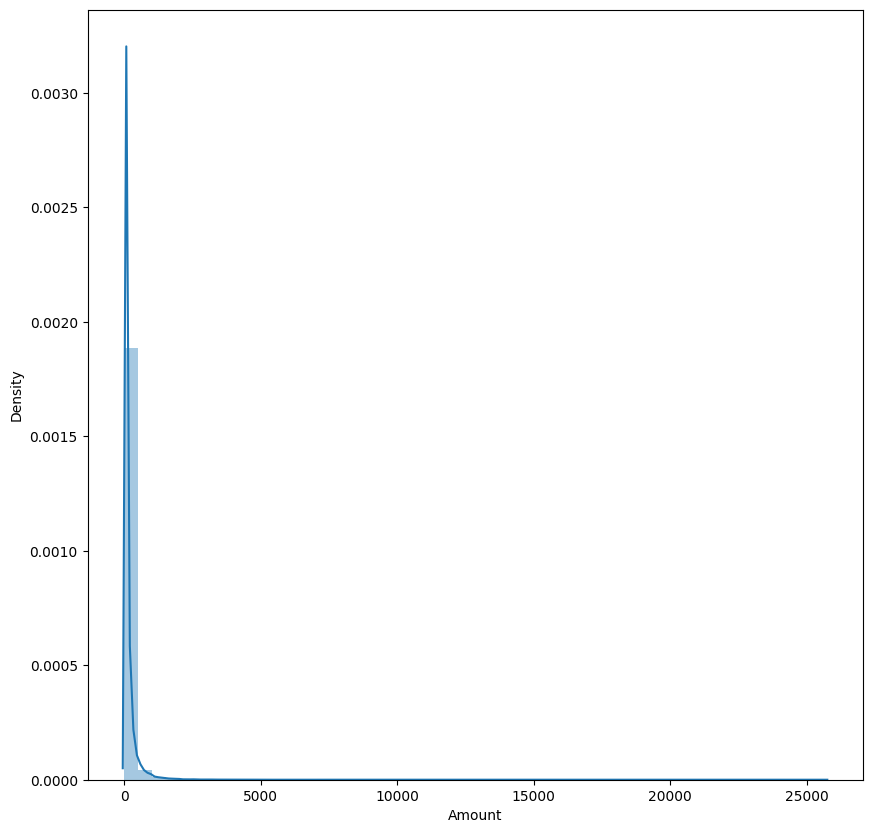

In [ ]:
# analyzing distribution of data in Amount
fig,ax = plt.subplots(figsize= (10,10))
sns.distplot(credit_data.Amount)

<ipython-input-87-da00ca8126d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data.V27)


<Axes: xlabel='V27', ylabel='Density'>

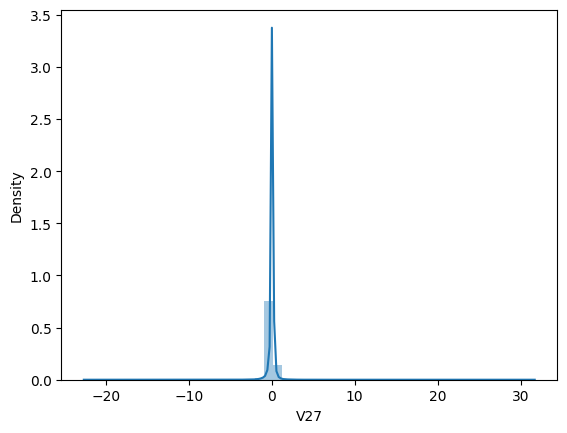

In [ ]:
sns.distplot(credit_data.V27)

<ipython-input-88-f10fe591208d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data.V28)


<Axes: xlabel='V28', ylabel='Density'>

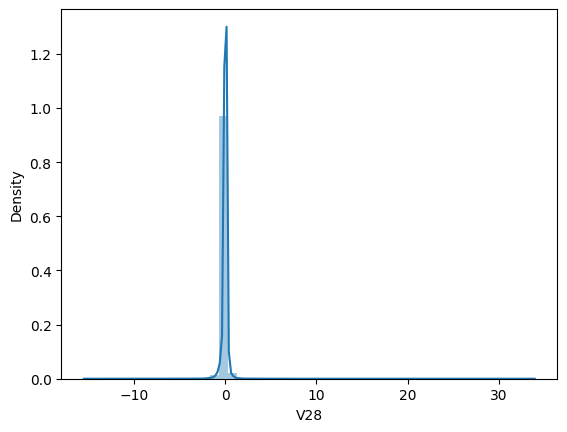

In [ ]:
sns.distplot(credit_data.V28)

<ipython-input-89-7770269c0130>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data.Class)


<Axes: xlabel='Class', ylabel='Density'>

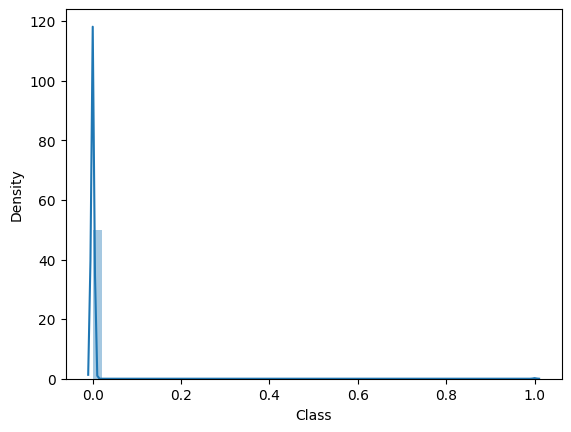

In [ ]:
sns.distplot(credit_data.Class)

In [ ]:
# here the data is on one side ....>>>> skew distribution


In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

 1 --> fraudulent  transaction

In [ ]:
# separating the data for analysis
legit = credit_data[credit_data.Class == 0]  # storing into new variables
fraud = credit_data[credit_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
legit.mean()

Time      94838.202258
V1            0.008258
V2           -0.006271
V3            0.012171
V4           -0.007860
V5            0.005453
V6            0.002419
V7            0.009637
V8           -0.000987
V9            0.004467
V10           0.009824
V11          -0.006576
V12           0.010832
V13           0.000189
V14           0.012064
V15           0.000161
V16           0.007164
V17           0.011535
V18           0.003887
V19          -0.001178
V20          -0.000644
V21          -0.001235
V22          -0.000024
V23           0.000070
V24           0.000182
V25          -0.000072
V26          -0.000089
V27          -0.000295
V28          -0.000131
Amount       88.291022
Class         0.000000
dtype: float64

In [ ]:
fraud.mean()

Time      80746.806911
V1           -4.771948
V2            3.623778
V3           -7.033281
V4            4.542029
V5           -3.151225
V6           -1.397737
V7           -5.568731
V8            0.570636
V9           -2.581123
V10          -5.676883
V11           3.800173
V12          -6.259393
V13          -0.109334
V14          -6.971723
V15          -0.092929
V16          -4.139946
V17          -6.665836
V18          -2.246308
V19           0.680659
V20           0.372319
V21           0.713588
V22           0.014049
V23          -0.040308
V24          -0.105130
V25           0.041449
V26           0.051648
V27           0.170575
V28           0.075667
Amount      122.211321
Class         1.000000
dtype: float64

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sam = legit.sample(n = 492)  # takes any n samples

In [ ]:
# Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sam,fraud],axis=0)  # row wise

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
103298,68591.0,0.292632,0.585547,1.642385,1.372019,-0.558641,0.186679,-0.308856,-0.715156,0.100239,...,0.443983,-0.989233,0.009981,0.381327,0.947891,-0.430910,0.108205,0.089537,12.99,0
215956,140296.0,1.893612,-0.470306,-0.286008,0.267585,-0.745468,-0.536635,-0.493625,0.015755,0.750941,...,-0.185213,-0.535992,0.413201,0.068220,-0.700735,0.203735,-0.048794,-0.047102,40.00,0
145205,86717.0,2.053909,0.022611,-1.042870,0.398106,-0.011273,-1.102009,0.247387,-0.373706,0.368069,...,-0.270219,-0.582579,0.333149,0.017874,-0.275100,0.197237,-0.060172,-0.058026,1.98,0
236452,148819.0,1.786956,-1.177170,-1.970543,-0.409710,-0.023956,-0.169520,0.104555,-0.187844,-0.694101,...,-0.323133,-0.792336,0.027389,0.182272,0.001997,-0.416483,-0.045855,-0.028629,202.65,0
130958,79467.0,-1.125251,0.753805,1.379482,0.099341,0.107455,-1.160501,0.541943,0.029871,0.371720,...,-0.129776,-0.183138,-0.229817,0.610858,0.155216,0.250080,0.194585,0.200766,29.56,0


In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95212.961382,0.145296,0.030682,0.023851,0.039243,-0.050672,0.073918,-0.014472,-0.041338,-0.034943,...,0.025661,-0.061211,0.003424,0.003135,-0.016698,-0.017031,0.000771,-0.032251,-0.015078,85.034167
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
103298   68591.0  0.292632  0.585547  1.642385  1.372019 -0.558641  0.186679   
215956  140296.0  1.893612 -0.470306 -0.286008  0.267585 -0.745468 -0.536635   
145205   86717.0  2.053909  0.022611 -1.042870  0.398106 -0.011273 -1.102009   
236452  148819.0  1.786956 -1.177170 -1.970543 -0.409710 -0.023956 -0.169520   
130958   79467.0 -1.125251  0.753805  1.379482  0.099341  0.107455 -1.160501   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

103298    0
215956    0
145205    0
236452    0
130958    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2) # 20 % data for test and 80 for train # stratifying Y for equal dis of 0s and 1s

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

## Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

# *Model* Evaluation

**Accuracy** **Score**

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score on Test Data : ', training_data_accuracy)

Accuracy score on Test Data :  0.9491740787801779


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843
